In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [38]:
nubb = pd.read_hdf("../data/Trackreco/ATPC_0nubb_15bar_nodiff_reco.h5", "data")
nubb_meta = pd.read_hdf("../data/Trackreco/ATPC_0nubb_15bar_nodiff_reco.h5", "meta")
display(nubb)
display(nubb_meta)

# Load the dictionary back from the pickle file (binary mode)
with open("../data/Trackreco/ATPC_0nubb_15bar_nodiff_trackreco.pkl", 'rb') as pickle_file:  # Use 'rb' for reading in binary
    Tracks_nubb      = pickle.load(pickle_file)
    connections_nubb = pickle.load(pickle_file)
    connection_counts_nubb = pickle.load(pickle_file)

Tl = pd.read_hdf("../data/Trackreco/ATPC_Tl_15bar_nodiff_reco.h5", "data")
Tl_meta = pd.read_hdf("../data/Trackreco/ATPC_Tl_15bar_nodiff_reco.h5", "meta")
display(Tl)
display(Tl_meta)

# Load the dictionary back from the pickle file (binary mode)
with open("../data/Trackreco/ATPC_Tl_15bar_nodiff_trackreco.pkl", 'rb') as pickle_file:  # Use 'rb' for reading in binary
    Tracks_Tl      = pickle.load(pickle_file)
    connections_Tl = pickle.load(pickle_file)
    connection_counts_Tl = pickle.load(pickle_file)




,event_id,x,y,z,energy,id,primary,trkID,cumulative_distance,angle
0,75,-637.196960,-1249.738770,1510.021851,0.189525,17,1,0,0.000000,0.000000
1,75,-637.769775,-1251.619385,1508.415405,0.023650,11,1,0,2.538798,111.742777
2,75,-637.404785,-1252.788330,1507.663940,0.011550,15,1,0,3.975583,28.801896
3,75,-634.588684,-1253.751953,1506.414185,0.088025,21,1,0,7.203723,48.167717
4,75,-632.853149,-1251.176025,1504.820923,0.062250,23,1,0,10.694563,67.037068
...,...,...,...,...,...,...,...,...,...,...
48,799,913.002563,-401.661926,2007.290161,0.010125,48,1,0,160.032355,3.378342
49,799,914.609253,-404.754456,2006.408325,0.094350,49,1,0,163.627187,11.490674
50,799,917.817505,-407.338318,2004.626099,0.006250,50,1,0,168.115567,24.200612
51,799,919.197571,-407.990143,2003.325684,0.013275,51,1,0,170.120695,20.506905


,event_id,trkID,energy,cumulative_distance
0,75,0,2.347950,162.281726
1,75,1,0.075550,0.000000
2,75,2,0.034525,0.000000
0,76,0,0.933775,72.555134
1,76,1,0.338875,32.331987
...,...,...,...,...
1,795,1,0.059875,8.159398
0,796,0,2.458000,182.303407
0,797,0,2.457675,143.956386
0,798,0,2.457850,204.668279


,event_id,x,y,z,energy,id,primary,trkID,cumulative_distance,angle
0,200000,1242.775635,643.997009,4370.031738,0.140525,8,1,0,0.000000,0.000000
1,200000,1241.398193,644.504944,4369.503418,0.181475,7,1,0,1.560277,29.472360
2,200000,1236.112061,641.122620,4367.349121,0.034650,0,1,0,8.195359,49.659616
3,200000,1237.267090,640.865845,4367.596680,0.007525,1,1,0,9.404206,136.007988
4,200000,1239.015137,639.666260,4370.046875,0.042025,4,1,0,12.644288,41.496615
...,...,...,...,...,...,...,...,...,...,...
64,1100049,2138.599609,-2856.838867,3899.955078,0.046250,68,1,0,204.283055,9.977026
65,1100049,2135.386475,-2860.907959,3904.307129,0.029800,61,1,0,211.052257,61.727543
66,1100049,1687.575073,-2984.634521,3937.713623,0.029750,0,0,1,0.000000,0.000000
67,1100049,1690.844727,-2986.719971,3932.167480,0.095775,2,0,1,6.767528,151.642102


In [49]:
print(len(nubb.event_id.unique()))
print(len(Tl.event_id.unique()))

148650
148800


,event_id,trkID,energy,cumulative_distance
0,200000,0,2.381625,172.494778
1,200000,1,0.185000,0.000000
2,200000,2,0.033625,0.000000
0,200001,0,1.281125,88.547512
1,200001,1,0.071975,0.000000
...,...,...,...,...
3,1100048,3,0.029800,0.000000
4,1100048,4,0.419600,7.045464
5,1100048,5,0.239525,3.328653
0,1100049,0,2.379200,211.052257


{0: [4, 1], 4: [0, 9], 1: [0, 2], 2: [3, 1], 3: [2, 5], 5: [6, 3], 6: [5, 7], 7: [6, 8], 8: [10, 7], 10: [8, 11], 9: [12, 4], 12: [9, 14], 11: [10, 13], 14: [12, 23], 13: [16, 11], 16: [13, 24], 15: [29, 23], 29: [15, 30], 17: [20, 19], 20: [17, 18], 18: [22, 20], 22: [18, 26], 19: [21, 17], 21: [19, 28], 23: [14, 15], 24: [27, 16], 27: [24, 25], 25: [27, 26], 26: [22, 25], 28: [21, 32], 30: [29, 31], 31: [30, 34], 32: [33, 28], 33: [32, 39], 34: [31, 35], 35: [36, 34], 36: [35, 37], 37: [38, 36], 38: [37, 40], 39: [46, 33], 46: [39, 41], 40: [38, 43], 41: [42, 46], 42: [41, 48], 43: [44, 40], 44: [43, 45], 45: [44, 47], 47: [45, 51], 48: [42, 52], 49: [50], 50: [49, 53], 51: [54, 47], 54: [51, 55], 52: [53, 48], 53: [52, 50], 55: [54, 57], 57: [55, 58], 58: [59, 57], 59: [58, 60], 60: [59, 61], 61: [60, 62], 62: [63, 61], 63: [62, 67], 64: [66, 65], 66: [64, 69], 65: [68, 64, 56], 68: [65, 70], 69: [66, 72], 67: [71, 63], 71: [67, 73], 70: [68, 75], 72: [69, 74], 73: [71, 74], 74: [73

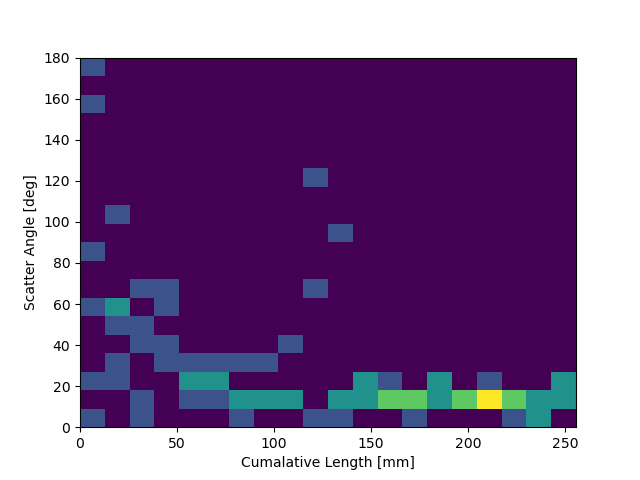

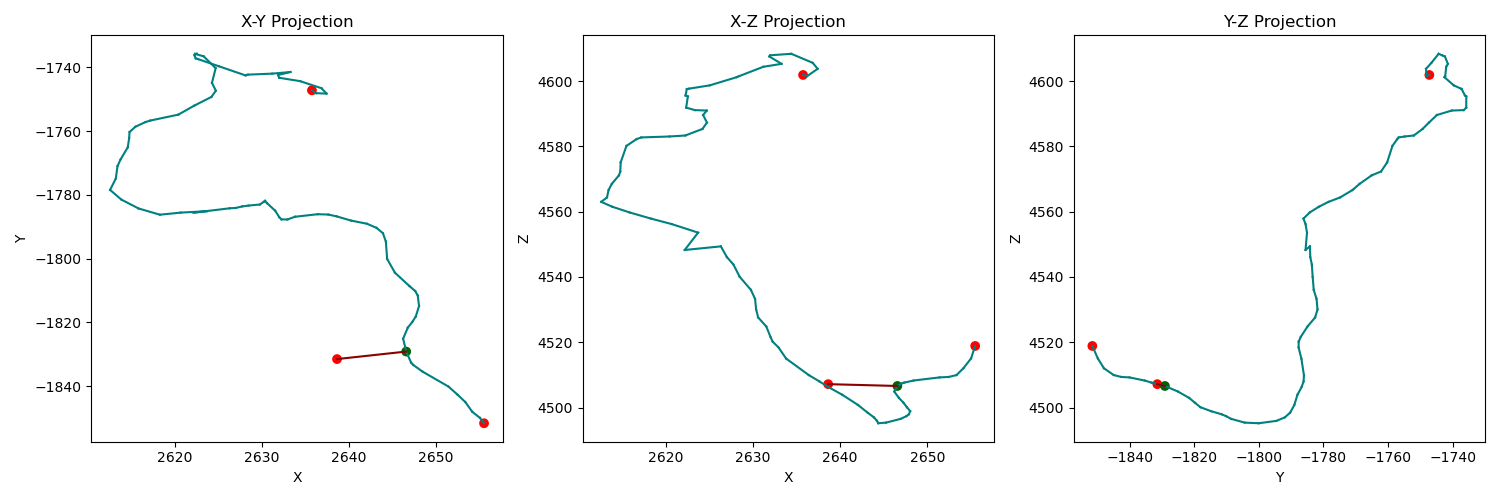

In [103]:
%matplotlib widget


evid = 200008

event = Tl[Tl.event_id == evid]
event.index = event.id
Track = Tracks_Tl[evid]
connection = connections_Tl[evid]
connection_count = connection_counts_Tl[evid]


# event = nubb[nubb.event_id == evid]
# event.index = event.id
# Track = Tracks_nubb[evid]
# connection = connections_nubb[evid]
# connection_count = connection_counts_nubb[evid]

print(connection)

plt.figure()

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.hist2d(event.cumulative_distance, event.angle, bins = 20);

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Scatter Angle [deg]")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)

# Plot xz projection
plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)

# Plot yz projection
plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)

plt.tight_layout()

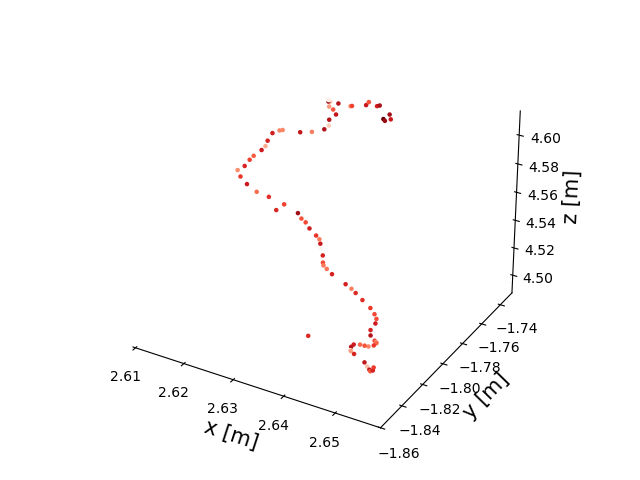

In [55]:
# 3D event display
%matplotlib widget


ids = Tl.event_id.unique()
# id_ = ids[48]
id_ = 200008

event = Tl[Tl.event_id == id_]

ax = plt.figure().add_subplot(projection='3d')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax.scatter(event.x/1000,event.y/1000, event.z/1000, c = event.energy, s = 5, cmap='BuGn', alpha=1, norm=mcolors.LogNorm())
ax.scatter(event.x/1000,event.y/1000, event.z/1000, c = event.energy, s = 5, cmap='Reds', alpha=1, norm=mcolors.LogNorm())


ax.set_xlabel("x [m]", fontsize = 15)
ax.set_ylabel("y [m]", fontsize = 15)
ax.set_zlabel("z [m]", fontsize = 15)
ax.tick_params(axis='both', which='both', labelsize=10)  # Adjust labelsize as needed

# Remove the background grid panes and gridlines
ax.xaxis.pane.set_edgecolor('none')  # Removes the edges
ax.yaxis.pane.set_edgecolor('none')
ax.zaxis.pane.set_edgecolor('none')
ax.xaxis.pane.set_visible(False)  # Removes the background pane
ax.yaxis.pane.set_visible(False)
ax.zaxis.pane.set_visible(False)
ax.grid(False)  # Remove the gridlines

plt.savefig(f"plots/Dave/Background_Evt{id_}.pdf")
plt.tight_layout()


,event_id,N_tracks
8,200008,2
17,200017,2
28,200028,2
33,200033,2
41,200041,2
...,...,...
148716,300000016,2
148723,300000023,2
148731,300000031,2
148769,300100019,2


AttributeError: 'DataFrame' object has no attribute 'primary'

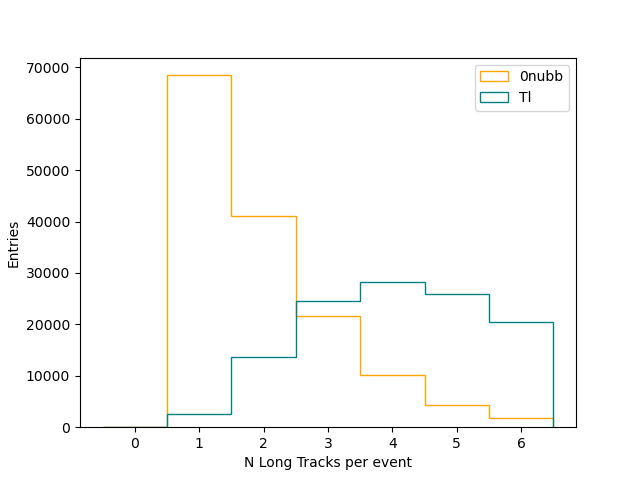

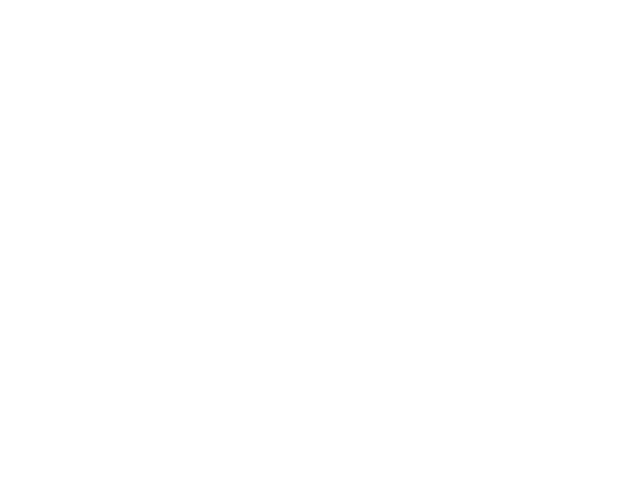

In [104]:
# Plot some variables like number of tracks


def GetNLongTracks(df_meta):

    # Set threshold for cumulative_distance
    threshold = 0

    # Step 1: Filter rows based on cumulative_distance
    filtered_df = df_meta[df_meta["cumulative_distance"] >= threshold]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts


nubb_counts = GetNLongTracks(nubb_meta)
Tl_counts = GetNLongTracks(Tl_meta)
nubb_counts_evts = nubb_counts[nubb_counts.N_tracks == 1].event_id.unique()
Tl_counts_evts = Tl_counts[Tl_counts.N_tracks == 1].event_id.unique()


display(Tl_counts[Tl_counts.N_tracks == 2])

bin_edges = np.arange(-0.5, 7.5, 1)
bin_centers = np.arange(0, 7, 1)

plt.figure()  # Adjust the figure size as needed

# Multiplicities
plt.hist(nubb_counts.N_tracks, bins = bin_edges, histtype="step", color = "orange", label = "0nubb");
plt.hist(Tl_counts.N_tracks, bins = bin_edges, histtype="step", color = "Teal", label = "Tl");
plt.xlabel("N Long Tracks per event")
plt.ylabel("Entries")
plt.xticks(bin_centers) ;
plt.legend()


plt.figure()  # Adjust the figure size as needed

nubb_primary = nubb[nubb.primary == 1]
nubb_primary = nubb_primary.groupby(["event_id"]).agg({
        "energy": "sum",  # Sum the energy
        "cumulative_distance": "max"  # Get the largest cumulative_distance
    }).reset_index()

Tl_primary = Tl[Tl.primary == 1]
Tl_primary = Tl_primary.groupby(["event_id"]).agg({
        "energy": "sum",  # Sum the energy
        "cumulative_distance": "max"  # Get the largest cumulative_distance
    }).reset_index()


plt.hist(nubb_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = "orange", label = "0nubb");
plt.hist(Tl_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = "Teal", label = "Tl");
plt.xlabel("Priamry Track Energy [MeV]")
plt.ylabel("Entries")
plt.legend()

plt.figure()
plt.hist(nubb_primary.cumulative_distance, bins = 100, histtype="step", color = "orange", label = "0nubb");
plt.hist(Tl_primary.cumulative_distance, bins = 100, histtype="step", color = "Teal", label = "Tl");
plt.xlabel("Priamry Track Length [mm]")
plt.ylabel("Entries")
plt.legend()


plt.figure()
plt.hist(nubb_primary[ (nubb_primary.energy>2.2) & (nubb_primary.event_id.isin(nubb_counts_evts)) ].cumulative_distance, bins = 100, histtype="step", color = "orange", label = "0nubb");
plt.hist(Tl_primary[ (Tl_primary.energy>2.2) & (Tl_primary.event_id.isin(Tl_counts_evts)) ].cumulative_distance, bins = 100, histtype="step", color = "Teal", label = "Tl");
plt.xlabel("Priamry Track Length [mm]")
plt.ylabel("Entries")
plt.legend()

nubb_topology_evts = nubb_primary[ (nubb_primary.energy>2.2) & (nubb_primary.event_id.isin(nubb_counts_evts)) ].event_id.unique()
Tl_topology_evts = Tl_primary[ (Tl_primary.energy>2.2) & (Tl_primary.event_id.isin(Tl_counts_evts)) ].event_id.unique()



In [56]:
# Apply an event filter

def GetEnergyinRange(df, p_start, distance_threshold):
    # Get coordinates where id is p_start
    start_coord = df[df['id'] == p_start][['x', 'y', 'z']].values

    # Calculate the Euclidean distance from each row to each row with id == p_start
    distances = np.sqrt(((df[['x', 'y', 'z']].values[:, None] - start_coord) ** 2).sum(axis=2))

    # Find rows where any distance to id == p_start rows is less than the threshold
    mask = (distances < distance_threshold).any(axis=1)
    result = df[mask]
    return result.energy.sum()

def SortEnergy(blob1, blob2):

    if (blob1 > blob2):
        return blob1, blob2
    else:
        return blob2, blob1


def GetTrackProperties(df, Tracks_df):

    counter = 0
    properties_df = pd.DataFrame(columns=["event_id", "long_deltas", "brems", "blob1", "blob2"])

    for eid in df.event_id.unique():
        

        temp_df = df[df.event_id == eid]
        Tracks = Tracks_df[eid]

        # Deltas = temp_df[temp_df.primary == 0]
        # Deltas = Deltas.loc[Deltas.groupby(["event_id", "trkID"])["cumulative_distance"].idxmax()]
        # long_deltas_flag = (Deltas["cumulative_distance"] > 10).any()

        # Check for any detached tracks from the primary
        primaryid = temp_df[temp_df.primary == 1]["trkID"].iloc[0]

        for t in Tracks:
            if t["id"] == primaryid:
                primary_nodes = t["nodes"]
                p_start = t["start"]
                p_end = t["end"]

        brem_flag = False
        for t in Tracks:
            if t["id"] != primaryid:
                found = any(item in primary_nodes for item in t["nodes"])
            
                # There was a detached track from primary had more than a certain amount of energy, so remove event
                if (not found and t["energy"] > 85e-3):
                    brem_flag = True


        # Now Get the energy of the primary end points
        start_energy = GetEnergyinRange(temp_df, p_start, 10)
        end_energy = GetEnergyinRange(temp_df, p_end, 10)

        blob1, blob2 = SortEnergy(start_energy, end_energy)


        # Create a new DataFrame to append
        new_data = pd.DataFrame({
            "event_id": [eid],
            # "long_deltas": [long_deltas_flag],
            "brems": [brem_flag],
            "blob1" : [blob1],
            "blob2" : [blob2]
        })

        properties_df = pd.concat([properties_df, new_data], ignore_index=True)

        # if counter == 10:
        #     break

        counter = counter+1

    return properties_df




In [6]:
# Look at the number of unique tracks for an event

nubb_uTrk = nubb.groupby('event_id')['trkID'].nunique().reset_index()
Tl_uTrk = Tl.groupby('event_id')['trkID'].nunique().reset_index()

print(len(nubb_uTrk[nubb_uTrk.trkID == 1]))
print(len(Tl_uTrk[Tl_uTrk.trkID == 1]))

uTrk_nubb = nubb_uTrk[nubb_uTrk.trkID == 1].event_id.unique()
uTrk_Tl = Tl_uTrk[Tl_uTrk.trkID == 1].event_id.unique()

2410
2346


In [61]:
# Plot the number of angular scatters for background in the first 500 mm

def GetMinMaxCounts(df):
    df_blobs = df[df.primary == 1]
    df_blobs = df_blobs[df_blobs.cumulative_distance < 20]
    df_blobs = df_blobs[df_blobs.angle > 30]
    df_counts = df_blobs['event_id'].value_counts()
    df_counts = df_blobs['event_id'].value_counts().reset_index()
    df_counts.columns = ['event_id', 'count']

    df_blobs2 = df[df.primary == 1]

    max_cumulative_per_event = df_blobs2.groupby('event_id')['cumulative_distance'].transform('max')
    threshold_per_event = max_cumulative_per_event - 20
    df_blobs2 = df_blobs2[df_blobs2['cumulative_distance'] > threshold_per_event]
    df_blobs2 = df_blobs2[df_blobs2.angle > 30]
    df_counts2 = df_blobs2['event_id'].value_counts()
    df_counts2 = df_blobs2['event_id'].value_counts().reset_index()
    df_counts2.columns = ['event_id', 'count']

    df_merged = pd.merge(df_counts, df_counts2, on='event_id', how='inner')  # Inner join by default
    df_merged['max_count'] = df_merged[['count_x', 'count_y']].max(axis=1)
    df_merged['min_count'] = df_merged[['count_x', 'count_y']].min(axis=1)

    return df_merged

Tl_merged = GetMinMaxCounts(Tl)
nubb_merged = GetMinMaxCounts(nubb)

# Comment this out for the full sample
# nubb_merged = nubb_merged[nubb_merged.event_id.isin(uTrk_nubb)]
# Tl_merged = Tl_merged[Tl_merged.event_id.isin(uTrk_Tl)]

print(len(nubb.event_id.unique()), len(nubb_merged.event_id.unique()))
print(len(Tl.event_id.unique()), len(Tl_merged.event_id.unique()))

# nubb_merged = nubb_merged[nubb_merged.] 


display(Tl_merged)
display(nubb_merged)

148650 145069
148800 126387


,event_id,count_x,count_y,max_count,min_count
0,212700001,11,1,11,1
1,174000005,11,7,11,7
2,296900029,11,9,11,9
3,143900042,11,1,11,1
4,138700017,11,2,11,2
...,...,...,...,...,...
126382,192100020,1,6,6,1
126383,192100019,1,7,7,1
126384,57500045,1,4,4,1
126385,57500043,1,5,5,1


,event_id,count_x,count_y,max_count,min_count
0,211901,11,4,11,4
1,90184,11,1,11,1
2,97653,11,4,11,4
3,37169,11,2,11,2
4,86500,11,4,11,4
...,...,...,...,...,...
145064,176109,1,4,4,1
145065,155880,1,6,6,1
145066,36497,1,6,6,1
145067,155886,1,4,4,1


Text(0.5, 0, 'Num hits > 20 deg start/end')

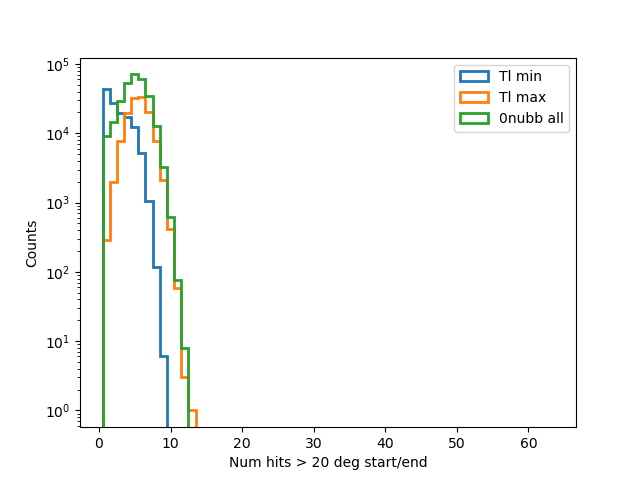

In [62]:
plt.figure()
# Step 1: Count the occurrences of each event_id


# Step 2: Plot histogram of the counts (excluding unique events)
plt.hist(Tl_merged["min_count"], bins=range(1, 65), align='left', histtype="step", linewidth = 2, label = "Tl min");
plt.hist(Tl_merged["max_count"], bins=range(1, 65), align='left', histtype="step", linewidth = 2, label = "Tl max");

combined_counts_nubb = np.concatenate([nubb_merged["max_count"], nubb_merged["min_count"]])
plt.hist(combined_counts_nubb, bins=range(1, 65), align='left', histtype="step", linewidth = 2, label = "0nubb all");

plt.semilogy()
plt.legend()

plt.ylabel("Counts")
plt.xlabel("Num hits > 20 deg start/end")

         event_id  count_x  count_y  max_count  min_count
0       212700001       11        1         11          1
1       174000005       11        7         11          7
2       296900029       11        9         11          9
3       143900042       11        1         11          1
4       138700017       11        2         11          2
...           ...      ...      ...        ...        ...
126382  192100020        1        6          6          1
126383  192100019        1        7          7          1
126384   57500045        1        4          4          1
126385   57500043        1        5          5          1
126386  235100004        1        7          7          1

[126387 rows x 5 columns]
148650 145069  Eff =  97.59098553649513
148800 126387  Eff =  84.9375


Text(0.5, 0, 'Num hits > 20 deg start/end')

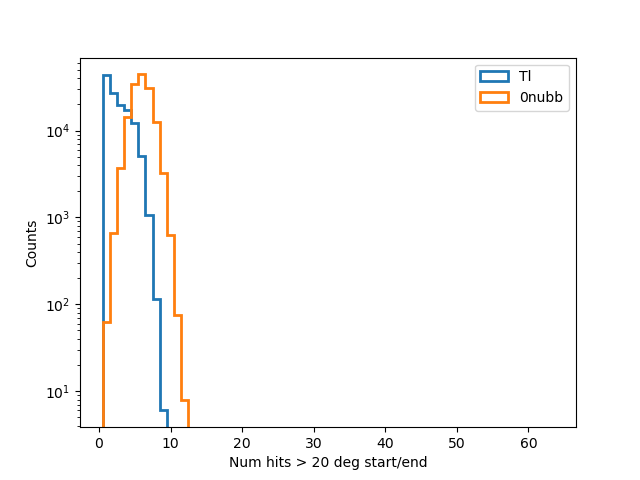

In [64]:
plt.figure()
# Step 1: Count the occurrences of each event_id

cutval = 0

Tl_cut = Tl_merged[ (Tl_merged.count_x >cutval) & (Tl_merged.count_y >cutval) ]
nubb_cut = nubb_merged[ (nubb_merged.count_x >cutval) & (nubb_merged.count_y >cutval) ]

print(Tl_cut)

print(len(nubb.event_id.unique()), len(nubb_cut.event_id.unique()), " Eff = ", 100 * len(nubb_cut.event_id.unique())/len(nubb.event_id.unique()))
print(len(Tl.event_id.unique()), len(Tl_cut.event_id.unique()), " Eff = ", 100 * len(Tl_cut.event_id.unique())/len(Tl.event_id.unique()))

# Step 2: Plot histogram of the counts (excluding unique events)
plt.hist(Tl_cut["min_count"], bins=range(1, 65), align='left', histtype="step", linewidth = 2, label = "Tl");
plt.hist(nubb_cut["max_count"], bins=range(1, 65), align='left', histtype="step", linewidth = 2, label = "0nubb");

plt.semilogy()
plt.legend()

plt.ylabel("Counts")
plt.xlabel("Num hits > 20 deg start/end")

In [90]:
Tl_cut_events = Tl_cut.event_id.unique()
Tl_properties = GetTrackProperties(Tl[Tl.event_id.isin(Tl_cut_events)], Tracks_Tl)

nubb_cut_events = nubb_cut.event_id.unique()
nubb_properties = GetTrackProperties(nubb[nubb.event_id.isin(nubb_cut_events)], Tracks_nubb)

display(Tl_properties)

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_62968/4051880033.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  properties_df = pd.concat([properties_df, new_data], ignore_index=True)
/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_62968/4051880033.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  properties_df = pd.concat([properties_df, new_data], ignore_index=True)


,event_id,long_deltas,brems,blob1,blob2
0,200000,NaN,True,0.603675,0.055900
1,200001,NaN,True,0.450525,0.241500
2,200002,NaN,True,0.539150,0.083875
3,200003,NaN,True,0.538625,0.089100
4,200004,NaN,True,0.815300,0.535025
...,...,...,...,...,...
126382,1100044,NaN,True,0.544050,0.161725
126383,1100045,NaN,False,0.415450,0.158025
126384,1100046,NaN,True,0.409400,0.192300
126385,1100048,NaN,True,0.519925,0.234875


148650 59701  Eff =  40.16212579885637
148800 152  Eff =  0.10215053763440861


,event_id,long_deltas,brems,blob1,blob2
855,102000018,NaN,False,0.721450,0.450500
1321,103000017,NaN,False,0.567675,0.561550
1614,103600027,NaN,False,0.471850,0.402000
4978,110900021,NaN,False,0.404725,0.316700
5844,112700045,NaN,False,0.639250,0.425950
...,...,...,...,...,...
123439,93900013,NaN,False,0.971500,0.501050
123815,94800019,NaN,False,0.671500,0.415675
124451,9700016,NaN,False,0.460775,0.416400
124767,96800030,NaN,False,0.393275,0.370125


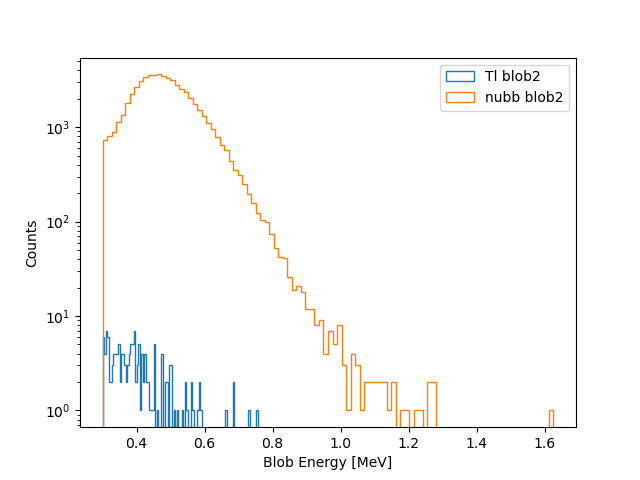

In [98]:
plt.figure()

# Tl_properties_cut = Tl_properties[ Tl_properties.long_deltas == False ]
# Tl_properties_cut = Tl_properties_cut[ Tl_properties_cut.brems == True ]
Tl_properties_cut = Tl_properties[Tl_properties.blob2 > 0.3]
Tl_properties_cut= Tl_properties_cut[Tl_properties_cut.event_id.isin(Tl_topology_evts)]



# nubb_properties_cut = nubb_properties[ nubb_properties.long_deltas == False ]
# nubb_properties_cut = nubb_properties_cut[ nubb_properties_cut.brems == True ]
nubb_properties_cut = nubb_properties[nubb_properties.blob2 > 0.3]
nubb_properties_cut= nubb_properties_cut[nubb_properties_cut.event_id.isin(nubb_topology_evts)]


# plt.hist(Tl_properties_cut.blob1, bins = 100, histtype="step", label = "Tl blob1")
plt.hist(Tl_properties_cut.blob2, bins = 100, histtype="step", label = "Tl blob2")

# plt.hist(nubb_properties_cut.blob1, bins = 100, histtype="step", label = "nubb blob1")
plt.hist(nubb_properties_cut.blob2, bins = 100, histtype="step", label = "nubb blob2")

plt.legend()
plt.xlabel("Blob Energy [MeV]")
plt.ylabel("Counts")
plt.semilogy()

print(len(nubb.event_id.unique()), len(nubb_properties_cut.event_id.unique()), " Eff = ", 100 * len(nubb_properties_cut.event_id.unique())/len(nubb.event_id.unique()))
print(len(Tl.event_id.unique()), len(Tl_properties_cut.event_id.unique()), " Eff = ", 100 * len(Tl_properties_cut.event_id.unique())/len(Tl.event_id.unique()))

display(Tl_properties_cut)